# Water Quality Testing

In [1]:
#importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

In [2]:
#loading the dataset

In [3]:
water=pd.read_csv('water_potability.csv')
water.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


Content
The water_potability.csv file contains water quality metrics for 3276 different water bodies.

1. pH value: PH is an important parameter in evaluating the acid–base balance of water. It is also the indicator of acidic or alkaline condition of water status. WHO has recommended maximum permissible limit of pH from 6.5 to 8.5. The current investigation ranges were 6.52–6.83 which are in the range of WHO standards.

2. Hardness: Hardness is mainly caused by calcium and magnesium salts. These salts are dissolved from geologic deposits through which water travels. The length of time water is in contact with hardness producing material helps determine how much hardness there is in raw water. Hardness was originally defined as the capacity of water to precipitate soap caused by Calcium and Magnesium.

3. Solids (Total dissolved solids - TDS): Water has the ability to dissolve a wide range of inorganic and some organic minerals or salts such as potassium, calcium, sodium, bicarbonates, chlorides, magnesium, sulfates etc. These minerals produced un-wanted taste and diluted color in appearance of water. This is the important parameter for the use of water. The water with high TDS value indicates that water is highly mineralized. Desirable limit for TDS is 500 mg/l and maximum limit is 1000 mg/l which prescribed for drinking purpose.

4. Chloramines: Chlorine and chloramine are the major disinfectants used in public water systems. Chloramines are most commonly formed when ammonia is added to chlorine to treat drinking water. Chlorine levels up to 4 milligrams per liter (mg/L or 4 parts per million (ppm)) are considered safe in drinking water.

5. Sulfate: Sulfates are naturally occurring substances that are found in minerals, soil, and rocks. They are present in ambient air, groundwater, plants, and food. The principal commercial use of sulfate is in the chemical industry. Sulfate concentration in seawater is about 2,700 milligrams per liter (mg/L). It ranges from 3 to 30 mg/L in most freshwater supplies, although much higher concentrations (1000 mg/L) are found in some geographic locations.

6. Conductivity: Pure water is not a good conductor of electric current rather’s a good insulator. Increase in ions concentration enhances the electrical conductivity of water. Generally, the amount of dissolved solids in water determines the electrical conductivity. Electrical conductivity (EC) actually measures the ionic process of a solution that enables it to transmit current. According to WHO standards, EC value should not exceeded 400 μS/cm.

7. Organic_carbon: Total Organic Carbon (TOC) in source waters comes from decaying natural organic matter (NOM) as well as synthetic sources. TOC is a measure of the total amount of carbon in organic compounds in pure water. According to US EPA < 2 mg/L as TOC in treated / drinking water, and < 4 mg/Lit in source water which is use for treatment.

8. Trihalomethanes: THMs are chemicals which may be found in water treated with chlorine. The concentration of THMs in drinking water varies according to the level of organic material in the water, the amount of chlorine required to treat the water, and the temperature of the water that is being treated. THM levels up to 80 ppm is considered safe in drinking water.

9. Turbidity: The turbidity of water depends on the quantity of solid matter present in the suspended state. It is a measure of light emitting properties of water and the test is used to indicate the quality of waste discharge with respect to colloidal matter. The mean turbidity value obtained for Wondo Genet Campus (0.98 NTU) is lower than the WHO recommended value of 5.00 NTU.

10. Potability: Indicates if water is safe for human consumption where 1 means Potable and 0 means Not potable.

In [4]:
#info in order get the information of the data 
water.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [5]:
#there are 3276 observations and 10 features all the features are numerical data

In [6]:
#describe method in order to know the distribution of the data

In [7]:
water.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [8]:
#checking for the duplicate values
water.duplicated().sum()

0

In [9]:
#since there is no duplicate value that is present

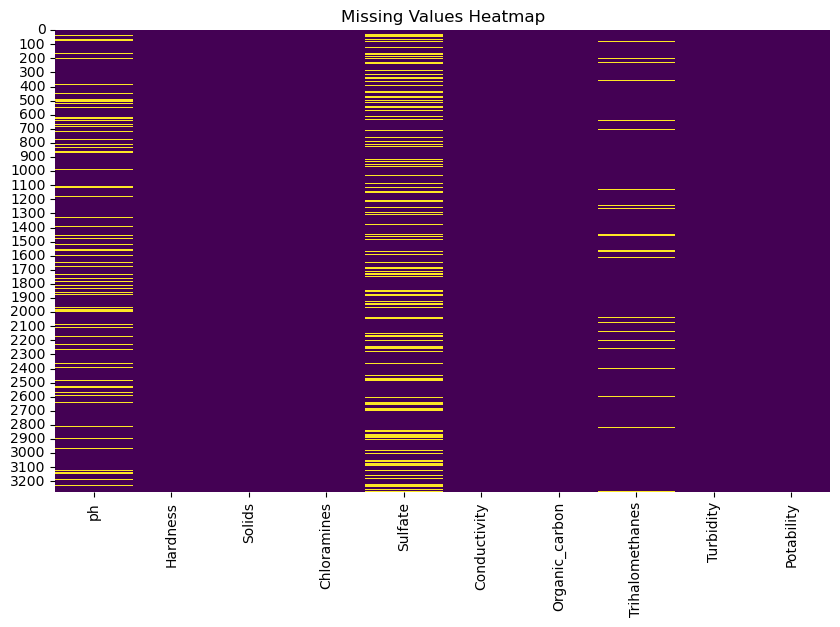

In [10]:
plt.figure(figsize=(10, 6))
sns.heatmap(water.isnull(), cmap='viridis', cbar=False)
plt.title('Missing Values Heatmap')
plt.show()

In [11]:
#since the columns like ph,sulfate and trihalomethanes the values are missing

In [12]:
len(water) 

3276

In [13]:
#checking for the null values
water.isnull().sum()/len(water)

ph                 0.149878
Hardness           0.000000
Solids             0.000000
Chloramines        0.000000
Sulfate            0.238400
Conductivity       0.000000
Organic_carbon     0.000000
Trihalomethanes    0.049451
Turbidity          0.000000
Potability         0.000000
dtype: float64

In [14]:
#since the missing percentage is not more it is less then 1% where im using some impution method to solve this

# Analysing the data

In [15]:
x=water.iloc[:,:-1]
x.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075


In [16]:
#observing the distribution of the data

Distribution of ph


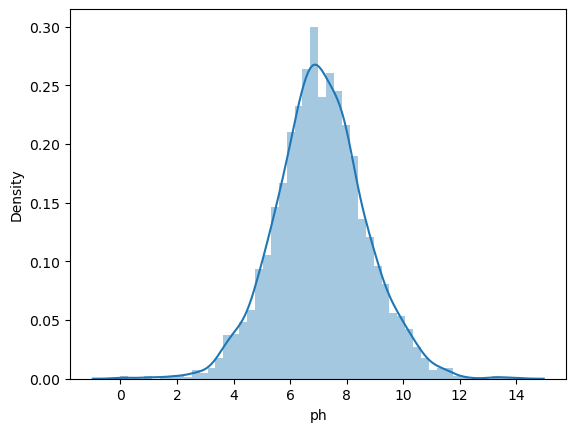

Distribution of Hardness


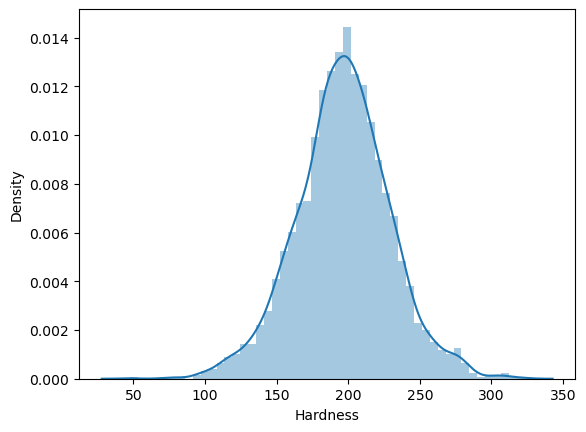

Distribution of Solids


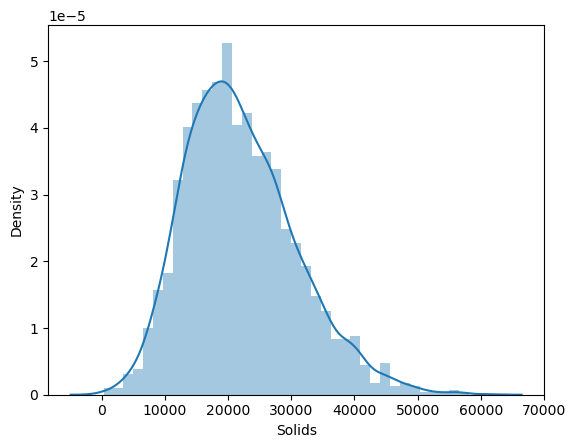

Distribution of Chloramines


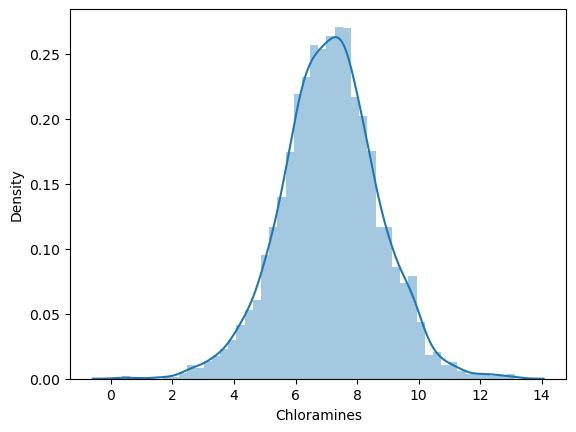

Distribution of Sulfate


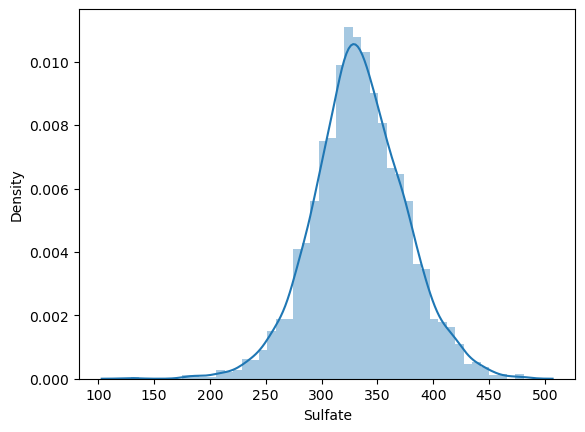

Distribution of Conductivity


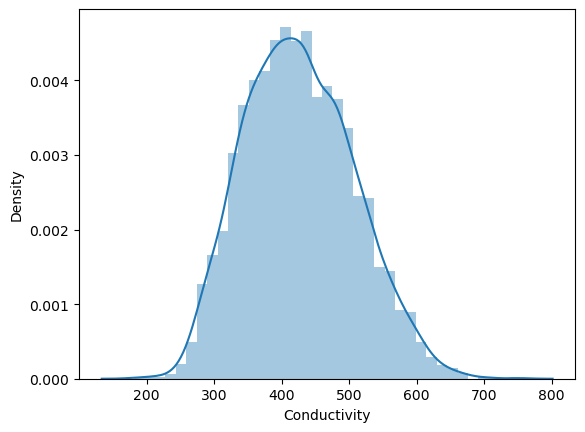

Distribution of Organic_carbon


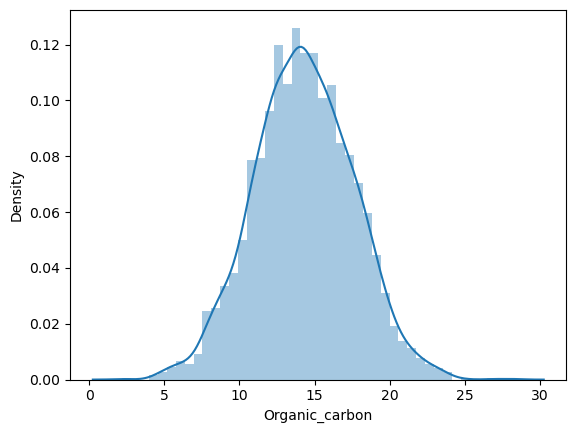

Distribution of Trihalomethanes


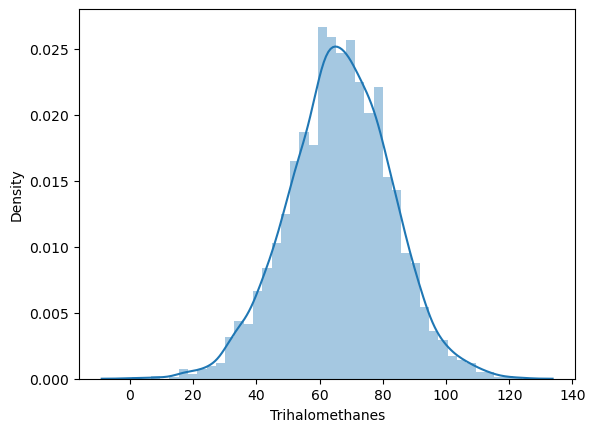

Distribution of Turbidity


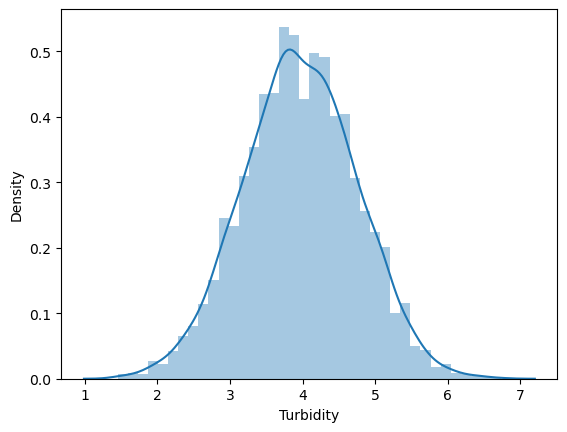

In [17]:
for i in x.columns:
    print(f'Distribution of {i}')
    sns.distplot(x[i])
    plt.show()

In [18]:
#since the data is normally distributed

In [19]:
#checking the frequency of target variable

<AxesSubplot:xlabel='Potability', ylabel='count'>

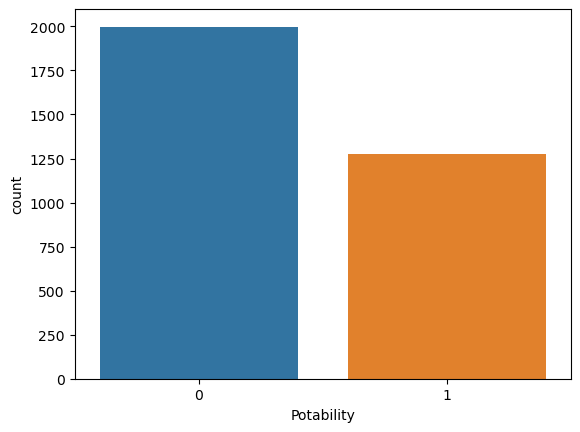

In [20]:
 sns.countplot(x=water['Potability'], data=water)

In [21]:
water['Potability'].value_counts()/len(water)

0    0.60989
1    0.39011
Name: Potability, dtype: float64

In [22]:
#since the data is imbalance the majority of the class is non portable water is around 60% where the minor class is protable water since the it around 40%

In [23]:
#bivariate analysis

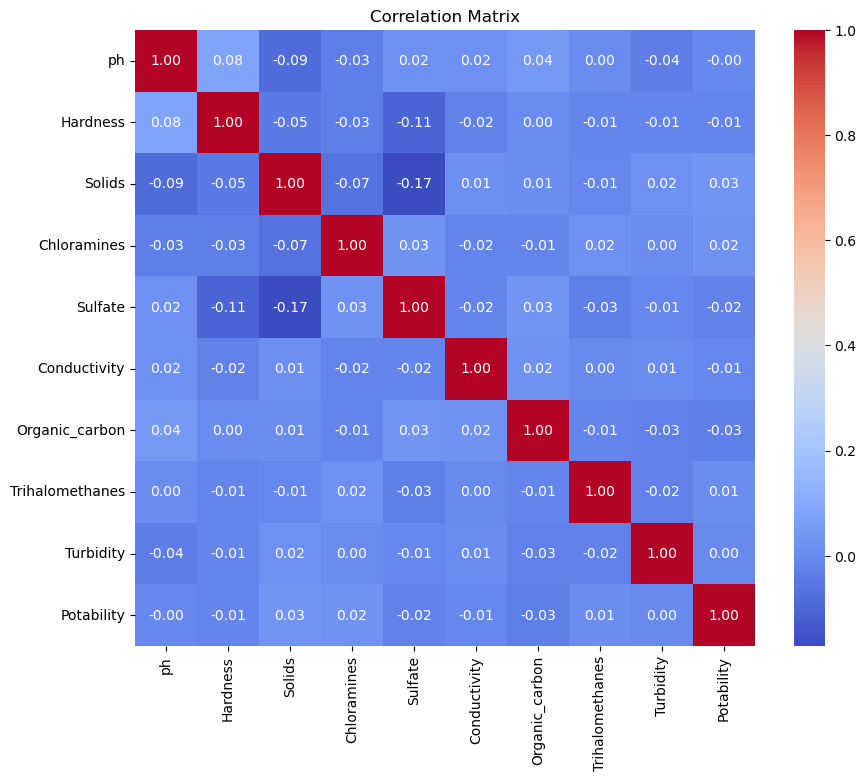

In [24]:
correlation_matrix =water.corr()

# Plot correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [25]:
#there is no significant feature which our target is dependent on the independent

In [26]:
water.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [27]:
#imputinh the missing values by mean since the data is normally distributed

In [28]:
water['ph']=water['ph'].fillna(water['ph'].mean())
water['Sulfate']=water['Sulfate'].fillna(water['Sulfate'].mean())
water['Trihalomethanes']=water['Trihalomethanes'].fillna(water['Trihalomethanes'].mean())

In [29]:
water.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [30]:
#since all are continuous variables so we have to standarixe

In [31]:
#taking the dependent and independent variables

In [32]:
X=water.iloc[:,:-1]
Y=water['Potability']
print(X.head())
print(Y.head())

         ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0  7.080795  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246  333.775777    592.885359   
2  8.099124  224.236259  19909.541732     9.275884  333.775777    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  
0       10.379783        86.990970   2.963135  
1       15.180013        56.329076   4.500656  
2       16.868637        66.420093   3.055934  
3       18.436524       100.341674   4.628771  
4       11.558279        31.997993   4.075075  
0    0
1    0
2    0
3    0
4    0
Name: Potability, dtype: int64


In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
standardized_data = scaler.transform(X)
X=standardized_data
print(X)

[[-1.02733269e-14  2.59194711e-01 -1.39470871e-01 ... -1.18065057e+00
   1.30614943e+00 -1.28629758e+00]
 [-2.28933938e+00 -2.03641367e+00 -3.85986650e-01 ...  2.70597240e-01
  -6.38479983e-01  6.84217891e-01]
 [ 6.92867789e-01  8.47664833e-01 -2.40047337e-01 ...  7.81116857e-01
   1.50940884e-03 -1.16736546e+00]
 ...
 [ 1.59125368e+00 -6.26829230e-01  1.27080989e+00 ... -9.81329234e-01
   2.18748247e-01 -8.56006782e-01]
 [-1.32951593e+00  1.04135450e+00 -1.14405809e+00 ... -9.42063817e-01
   7.03468419e-01  9.50797383e-01]
 [ 5.40150905e-01 -3.85462310e-02 -5.25811937e-01 ...  5.60940070e-01
   7.80223466e-01 -2.12445866e+00]]


In [34]:
#Train test split

In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=2)

# LogisticRegression

In [36]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

from sklearn.linear_model import LogisticRegression

In [37]:
logit=LogisticRegression()
lr=logit.fit(X_train,Y_train)
y_pred_train=logit.predict(X_train)
y_pred_test=logit.predict(X_test)
print()

#confusion report
print(confusion_matrix(Y_train,y_pred_train))
print()
print(confusion_matrix(Y_test,y_pred_test))
print()

#classification report
print(classification_report(Y_train,y_pred_train))
print()
print(classification_report(Y_test,y_pred_test))
print()
#accuracy score
print('Train Accuracy:', accuracy_score(Y_train,y_pred_train))
print()
print('Test Accuracy:', accuracy_score(Y_test,y_pred_test))
print()


[[1598    0]
 [1015    7]]

[[400   0]
 [256   0]]

              precision    recall  f1-score   support

           0       0.61      1.00      0.76      1598
           1       1.00      0.01      0.01      1022

    accuracy                           0.61      2620
   macro avg       0.81      0.50      0.39      2620
weighted avg       0.76      0.61      0.47      2620


              precision    recall  f1-score   support

           0       0.61      1.00      0.76       400
           1       0.00      0.00      0.00       256

    accuracy                           0.61       656
   macro avg       0.30      0.50      0.38       656
weighted avg       0.37      0.61      0.46       656


Train Accuracy: 0.6125954198473282

Test Accuracy: 0.6097560975609756



# SVC

In [38]:
from sklearn.svm import SVC
svc=SVC()
svcm=svc.fit(X_train,Y_train)
y_pred_train_svc=svc.predict(X_train)
y_pred_test_svc=svc.predict(X_test)
print()

#confusion report
print(confusion_matrix(Y_train,y_pred_train_svc))
print()
print(confusion_matrix(Y_test,y_pred_test_svc))
print()

#classification report
print(classification_report(Y_train,y_pred_train_svc))
print()
print(classification_report(Y_test,y_pred_test_svc))
print()
#accuracy score
print('Train Accuracy:', accuracy_score(Y_train,y_pred_train_svc))
print()
print('Test Accuracy:', accuracy_score(Y_test,y_pred_test_svc))
print()


[[1533   65]
 [ 635  387]]

[[367  33]
 [193  63]]

              precision    recall  f1-score   support

           0       0.71      0.96      0.81      1598
           1       0.86      0.38      0.53      1022

    accuracy                           0.73      2620
   macro avg       0.78      0.67      0.67      2620
weighted avg       0.77      0.73      0.70      2620


              precision    recall  f1-score   support

           0       0.66      0.92      0.76       400
           1       0.66      0.25      0.36       256

    accuracy                           0.66       656
   macro avg       0.66      0.58      0.56       656
weighted avg       0.66      0.66      0.61       656


Train Accuracy: 0.732824427480916

Test Accuracy: 0.6554878048780488



# K Nearest neighbors

In [39]:
from sklearn.neighbors import KNeighborsClassifier
knnc=KNeighborsClassifier()
knn=knnc.fit(X_train,Y_train)
y_pred_train_knn=knnc.predict(X_train)
y_pred_test_knn=knnc.predict(X_test)
print()


#confusion report
print(confusion_matrix(Y_train,y_pred_train_knn))
print()
print(confusion_matrix(Y_test,y_pred_test_knn))
print()

#classification report
print(classification_report(Y_train,y_pred_train_knn))
print()
print(classification_report(Y_test,y_pred_test_knn))
print()
#accuracy score
print('Train Accuracy:', accuracy_score(Y_train,y_pred_train_knn))
print()
print('Test Accuracy:', accuracy_score(Y_test,y_pred_test_knn))
print()


[[1395  203]
 [ 427  595]]

[[306  94]
 [157  99]]

              precision    recall  f1-score   support

           0       0.77      0.87      0.82      1598
           1       0.75      0.58      0.65      1022

    accuracy                           0.76      2620
   macro avg       0.76      0.73      0.73      2620
weighted avg       0.76      0.76      0.75      2620


              precision    recall  f1-score   support

           0       0.66      0.77      0.71       400
           1       0.51      0.39      0.44       256

    accuracy                           0.62       656
   macro avg       0.59      0.58      0.58       656
weighted avg       0.60      0.62      0.60       656


Train Accuracy: 0.7595419847328244

Test Accuracy: 0.6173780487804879



# K-fold cross validation

In [41]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=101)

cross_val_score(KNeighborsClassifier(),X_train,Y_train, cv=cv)

array([0.64503817, 0.63931298, 0.6221374 , 0.63167939, 0.63931298])

In [42]:
#the accuracy is like around 65%

# Making a Predictive System

In [46]:
input_data=(5.584086638456089,188.3133237696164,28748.68773904612,7.54486878877965,326.6783629116736,280.4679159334877,8.399734640152758,54.917861841994466,2.5597082275565217)

# change the input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)
# reshape the numpy array as we are predicting for one data point
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardizing the input data
input_data_std = scaler.transform(input_data_reshaped)
#giving the probability of the model
prediction = svc.predict(input_data_std)
print(prediction)

if(prediction[0] == 1):
    print('The water is portable')

else:
    print('The water is non portable')

[0]
The water is non portable


# Saving the trained model

In [47]:
import pickle
filename='trained_model.sav'
pickle.dump(svc,open(filename,'wb'))
#loading the saved model
loaded_model=pickle.load(open('trained_model.sav','rb'))

# Model for saved model

In [48]:
input_data=(5.584086638456089,188.3133237696164,28748.68773904612,7.54486878877965,326.6783629116736,280.4679159334877,8.399734640152758,54.917861841994466,2.5597082275565217)

# change the input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)
# reshape the numpy array as we are predicting for one data point
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardizing the input data
input_data_std = scaler.transform(input_data_reshaped)
#giving the probability of the model
prediction = loaded_model.predict(input_data_std)
print(prediction)

if(prediction[0] == 1):
    print('The water is portable')

else:
    print('The water is non portable')

[0]
The water is non portable
